## Rodrigo Xavier
## Matrícula 569037

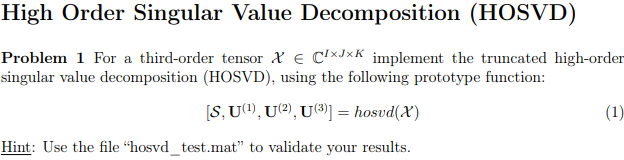

In [8]:
import numpy as np
from nmse import NMSE
from fold_unfold import (fold, unfold) # From homework 6
from multilinear_product import multilinear_product # From homework 7

def hosvd(X):
    """
    Performs Higher-Order Singular Value Decomposition (HOSVD) on a 
    third-order tensor.

    Args:
        X: The input tensor (3D numpy array).

    Returns:
        A tuple containing:
            S: The core tensor.
            U1: The matrix U^(1).
            U2: The matrix U^(2).
            U3: The matrix U^(3).
    """
    I1, I2, I3 = X.shape  # Get dimensions of input tensor X

    A1 = unfold(X, 1)  # Unfold X using first mode
    A2 = unfold(X, 2)  # Unfold X using second mode
    A3 = unfold(X, 3)  # Unfold X using third mode

    U1, _, _ = np.linalg.svd(A1)  # Compute the SVD of A1 and get U1
    U2, _, _ = np.linalg.svd(A2)  # Compute the SVD of A2 and get U2
    U3, _, _ = np.linalg.svd(A3)  # Compute the SVD of A3 and get u3

    S1 = np.dot(U1.T, np.dot(A1, np.kron(U3, U2)))  # Compute core tensor unfolded in the first mode
    S = fold(S1, (I1, I2, I3), 1)  # Fold the unfolded core tensor back to its original shape

    return S, U1, U2, U3  # Return core tensor S and factor matrices U1, U2, U3

In [9]:
from scipy.io import loadmat

# Testing with Practice 6 matrix:
mat_file = loadmat(r"C:\Users\Administrador\Documents\Doutorado\Algebra tensorial\Homeworks\matlab files\hosvd_test.mat")

U1 = mat_file['U1']
U2 = mat_file['U2']
U3 = mat_file['U3']
S = mat_file['tenS']
X = mat_file['tenX']

In [10]:
S_hat, U1_hat, U2_hat, U3_hat = hosvd(X)
X_hat = multilinear_product(S_hat, U1_hat, U2_hat, U3_hat) 

In [11]:
print(f'Error between X and X_hat: {float(NMSE(X, X_hat))}')
print(f'Error between S and S_hat: {float(NMSE(S, S_hat))}')
print(f'Error between U1 and U1_hat: {float(NMSE(U1, U1_hat))}')
print(f'Error between U2 and U2_hat: {float(NMSE(U2, U2_hat))}')
print(f'Error between U3 and U3_hat: {float(NMSE(U3, U3_hat))}')

Error between X and X_hat: 3.967142920535319e-31
Error between S and S_hat: 1.5607066827251084
Error between U1 and U1_hat: 1.5407439555097887e-32
Error between U2 and U2_hat: 0.0027553599528721477
Error between U3 and U3_hat: 0.8589876055111


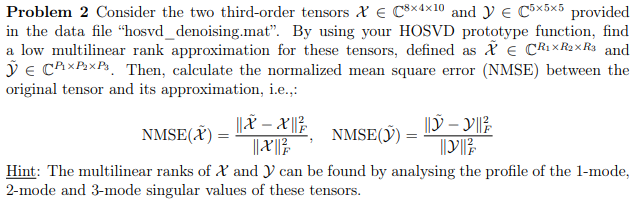

In [12]:
from scipy.io import loadmat

# Testing with hosvd_denoising file:
mat_file = loadmat(r"C:\Users\Administrador\Documents\Doutorado\Algebra tensorial\Homeworks\matlab files\hosvd_denoising.mat")
X = mat_file[ 'tenX_noise']
Y = mat_file[ 'tenY_noise']

print(f'X shape: {X.shape}')
print(f'Y shape: {Y.shape}')

X shape: (8, 4, 10)
Y shape: (5, 5, 5)


In [13]:
import numpy as np
import tensorly as tl

# Choosing what components to keep
R1_X = 4  # Example: Keep top 4 components in mode-1
R2_X = 2  # Example: Keep top 3 components in mode-2
R3_X = 5  # Example: Keep top 5 components in mode-3

print(f"Multilinear ranks for X: ({R1_X}, {R2_X}, {R3_X})")

# 2. Perform HOSVD 
S_X, U1_X, U2_X, U3_X = hosvd(X)

# 3. Truncate the factors and core tensor based on the selected ranks
U1_X = U1_X[:, :R1_X]
U2_X = U2_X[:, :R2_X]
U3_X = U3_X[:, :R3_X]
S_X = S_X[:R1_X, :R2_X, :R3_X]

# 4. Reconstruct X_hat
X_hat = multilinear_product(S_X, U1_X, U2_X, U3_X)

# 5. Calculate NMSE(X)
nmse_X = NMSE(X, X_hat)
print(f"NMSE(X): {nmse_X}")

# Choosing what compnoents to keep
R1_Y = 1  
R2_Y = 1 
R3_Y = 1 

print(f"Multilinear ranks for Y: ({R1_Y}, {R2_Y}, {R3_Y})")

S_Y, U1_Y, U2_Y, U3_Y = hosvd(Y)

# Truncate based on ranks
U1_Y = U1_Y[:, :R1_Y]
U2_Y = U2_Y[:, :R2_Y]
U3_Y = U3_Y[:, :R3_Y]
S_Y = S_Y[:R1_Y, :R2_Y, :R3_Y]

Y_hat = multilinear_product(S_Y, U1_Y, U2_Y, U3_Y)

nmse_Y = NMSE(Y, Y_hat)
print(f"NMSE(Y): {nmse_Y}")

Multilinear ranks for X: (4, 2, 5)
NMSE(X): 0.0457892373915594
Multilinear ranks for Y: (1, 1, 1)
NMSE(Y): 0.02046604964218626
